LaTeX header (do not delete)
$$
\newcommand{\Re}[1]{\mathrm{Re}\left\{ #1 \right\}}
\newcommand{\Im}[1]{\mathrm{Im}\left\{ #1 \right\}}
\newcommand{\avg}[1]{\left< #1 \right>}
$$

# Step 3 -- Driven Oscillations, Part 1 (Sinusoidal Forcing)
---

### Equation of motion

Here we begin to study oscillations governed by the linear *non-homogeneous* ODE

$$
  m\ddot{x} + b\dot{x} + kx = F(t),
$$

where as usual $m$ is the mass of the oscillator, $b$ is a damping parameter, and $k$ is the restoring force constant. What's new here is that the right-hand side of the equation is no longer zero, but instead is a given function of time. This non-zero right-hand side has the effect of an external force acting on the oscillator. Hence, we say the oscillator is 'driven' by an outside force. After dividing by $m$, we will write the equation of motion as

$$
  \ddot{x} + 2\beta\dot{x} + \omega_{0}^2 x = \frac{F_{0}}{m}\cos(\omega t)
  \quad\quad\text{where}\quad\quad
  \omega_{0} \equiv \sqrt{\frac{k}{m}}
  \quad,\quad
  \beta \equiv \frac{b}{2m}.
$$

In principle, $F(t)$ could be any function of time. However, in this notebook we only consider the special case a sinusoidal driving force, namely

$$
  F(t) = F_{0}\cos(\omega t).
$$

One subtlety to note is that this driving force has no beginning or end. It is "on" for all time. As a result, the solutions we obtain will also have this assumption built into them. If this seems like an unrealistic assumption, it is. In what follows, we are only finding the steady state response to this driving force. For a realistic driving force, which acts for a finite amount of time, the full response will also contain a transient part. We postpone discussion of transient solutions until later notebooks.

## 1. Frequency response

Steady state solutions can be found in a number of ways. Here let's first make the equation of motion complex by making the replacements

$$
  x(t) \rightarrow z(t) 
  \quad\quad\text{where}\quad\quad
  \Re{z(t)} = x(t)
$$

and 

$$
  \cos(\omega t) \rightarrow \exp(i\omega t)
  \quad\quad\text{where}\quad\quad
  \Re{\exp(i\omega t)} = \cos(\omega t).
$$

The "complexified" equation of motion is then

$$
  \ddot{z} + 2\beta\dot{z} + \omega_{0}^2 z = \frac{F_{0}}{m}\exp(i\omega t).
$$

Next take the (complex) ansatz $z(t)=A(\omega)e^{i(\omega t-\delta(\omega))}$. Plugging this into the equation of motion yields the auxiliary equation

$$
  A(\omega) e^{-i\delta(\omega)} = \frac{F_{0}/m}{-\omega^2 + 2i\beta\omega + \omega_{0}^2}
$$

**Exercise [pen & paper]:** verify this.

After isolating the complex modulus and argument of the right-hand side of this equation, we obtain expressions $A(\omega)$ and $\delta(\omega)$ in terms of the driving frequency $\omega$. These are

$$
  A(\omega) = \frac{F_{0}/m}{\sqrt{(\omega_{0}^2 - \omega^2)^2 + (2\beta\omega)^2}}
  \quad\quad,\quad\quad
  \delta(\omega) = \arctan\left(\frac{2\beta\omega}{\omega_{0}^2 - \omega^2}\right)
$$

NOTE: $A$ and $\delta$ are real variables.

**Exercise [pen & paper]:** carry out the complex variable algebra to verify the above. [*Hint*: first obtain the real and imaginary parts of the right-hand side by multiplying numerator and denominator by the complex conjugate of the denominator. Then calculate amplitude and phase.]

It is often useful to define the Q-factor ("quality" factor) of a system as 

$$
  Q \equiv \frac{\omega_{0}}{2\beta}
$$

A high-Q system is one with very little damping; a low-Q system is heavily damped.

**Exercise [matplotlib]:** Using the above results, plot $A(\omega)$ and $\delta(\omega)$ as functions of the driving frequency $\omega$. Do this for several values of the damping parameter $\beta$ (or equivalently several values of $Q$).

In [92]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

In [93]:
### frequency response functions ###
# amplitude
def amp(omega, mass, omega0, beta, f0):
    den = f0/mass
    num = np.sqrt((omega0*omega0 - omega*omega)**2 + (4*beta*beta*omega*omega))
    return den/num

# phase
def phase(omega, mass, omega0, beta, f0):
    re = omega0*omega0 - omega*omega
    im = 2*beta*omega
    return np.arctan2(im, re)

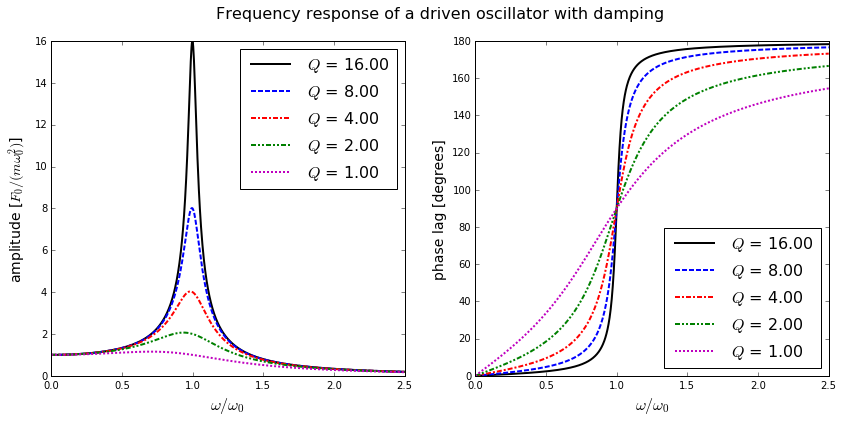

In [107]:
### plot frequency response, amplitude and phase ###
# model
mass = 1.0 
omega0 = 1.0
Q = np.array([1.0, 2.0, 4.0, 8.0, 16.0])
beta = omega0/(2*Q)
F0 = 1.0

# create uniform frequency grid
omegamin = 0.0
omegamax = 2.5
omegasteps = 1001 
omega = np.linspace(omegamin, omegamax, omegasteps)

# plot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
fig.subplots_adjust(left=0.05, right=0.95)
fig.suptitle('Frequency response of a driven oscillator with damping', fontsize=16)
# amplitude
ax1.plot(omega, amp(omega, mass, omega0, beta[-1], F0), 
         color='k', linestyle='-', linewidth=2, label=r'$Q$ = %.2f' % Q[-1])
ax1.plot(omega, amp(omega, mass, omega0, beta[-2], F0), 
         color='b', linestyle=(0, (5, 2)), linewidth=2, label=r'$Q$ = %.2f' % Q[-2])
ax1.plot(omega, amp(omega, mass, omega0, beta[-3], F0), 
         color='r', linestyle=(0, (5, 2, 2, 2)), linewidth=2, label=r'$Q$ = %.2f' % Q[-3])
ax1.plot(omega, amp(omega, mass, omega0, beta[-4], F0), 
         color='g', linestyle=(0, (5, 2, 2, 2, 2, 2)), linewidth=2, label=r'$Q$ = %.2f' % Q[-4])
ax1.plot(omega, amp(omega, mass, omega0, beta[-5], F0), 
         color='m', linestyle=(0, (2, 2)), linewidth=2, label=r'$Q$ = %.2f' % Q[-5])
ax1.set_xlim(omegamin,omegamax)
#ax1.set_title('Amplitude', fontsize=16)
ax1.set_xlabel(r'$\omega/\omega_{0}$', fontsize=16)
ax1.set_ylabel(r'amplitude [$F_{0}/(m\omega_{0}^2)$]', fontsize=14)
ax1.legend(loc='upper right', handlelength=3, fontsize=16)
# phase
ax2.plot(omega, phase(omega, mass, omega0, beta[-1], F0)*180/np.pi, 
         color='k', linestyle='-', linewidth=2, label=r'$Q$ = %.2f' % Q[-1])
ax2.plot(omega, phase(omega, mass, omega0, beta[-2], F0)*180/np.pi, 
         color='b', linestyle=(0, (5, 2)), linewidth=2, label=r'$Q$ = %.2f' % Q[-2])
ax2.plot(omega, phase(omega, mass, omega0, beta[-3], F0)*180/np.pi, 
         color='r', linestyle=(0, (5, 2, 2, 2)), linewidth=2, label=r'$Q$ = %.2f' % Q[-3])
ax2.plot(omega, phase(omega, mass, omega0, beta[-4], F0)*180/np.pi, 
         color='g', linestyle=(0, (5, 2, 2, 2, 2, 2)), linewidth=2, label=r'$Q$ = %.2f' % Q[-4])
ax2.plot(omega, phase(omega, mass, omega0, beta[-5], F0)*180/np.pi, 
         color='m', linestyle=(0, (2, 2)), linewidth=2, label=r'$Q$ = %.2f' % Q[-5])
ax2.set_xlim(omegamin,omegamax)
#ax2.set_title('Phase lag', fontsize=16)
ax2.set_xlabel(r'$\omega/\omega_{0}$', fontsize=16)
ax2.set_ylabel(r'phase lag [degrees]', fontsize=14)
ax2.legend(loc='lower right', handlelength=3, fontsize=16)
# show plots
plt.show()

## 2. Steady-state solutions

Recall that we started with the complex ansatz $z(t) = A(\omega)e^{i(\omega t - \delta(\omega)}$, plugged this into the complexified equation of motion, and obtained expressions for $A(\omega)$ and $\delta(\omega)$ and examined their properties. Now let's return to finding the actual steady-state solutions. This is done by taking the real part of $z(t)$

$$
  x(t) = \Re{z(t)}
  = \Re{A(\omega)e^{i(\omega t - \delta(\omega))}}
  = A(\omega)\cos(\omega t - \delta(\omega))
$$

NOTE: this solution contains no information about initial conditions. The reason is that this is a steady-state solution. From an ideal point of view, the driving force as well as the response have been occuring for all time, without beginning or end. And so initial conditions do not apply. Alternatively, from a realistic point of view, steady-state solutions represent the response after the system has settled down into a permanent pattern. If any friction is present, any transient (or non-steady-state) behavior has decayed away. In that sense, initial conditions of the system have been erased, and so they do not appear in the solution. We will see later that the initial conditions only appear in the transient part of the full solution. 

**Exercise [matplotlib]:** Using the above results, plot the responses for an undamped oscillator with driving frequencies $\omega/\omega_{0} = [0.5, 0.9, 1.1, 2.0]$. Verify that the amplitude grows as $\omega\rightarrow \omega_{0}$, and the phase lag approaches 180 degrees when $\omega>\omega_{0}$.

**Exercise [matplotlib]:** Repeat for a damped oscillator with $Q=[1.0, 4.0, 16.0]$.

In [95]:
### driving force ###
def driving(t, f0, omega):
    return f0*np.cos(omega*t)

### response ###
def response(t, mass, omega0, beta, f0, omega):
    A = amp(omega, mass, omega0, beta, f0)
    delta = phase(omega, mass, omega0, beta, f0)
    return A*np.cos(omega*t - delta)

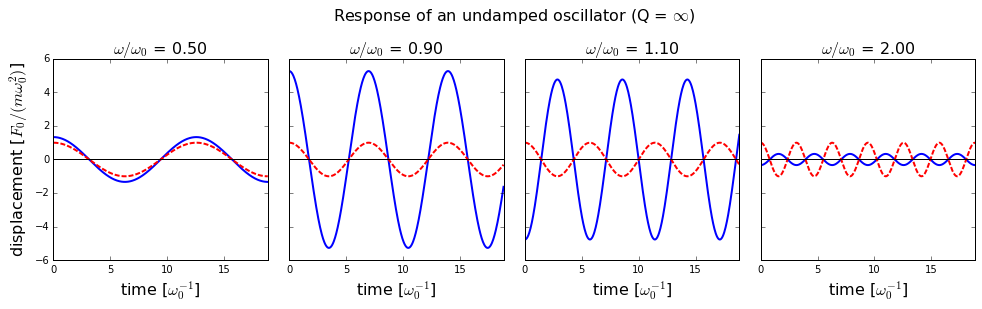

In [108]:
### plot response for an undamped oscillator ###
# model parameters
mass = 1.0
omega0 = 1.0
beta = 0
f0 = 1
omegaF = [0.5, 0.9, 1.1, 2.0]

# number of undamped periods
n = 3

# uniform time grid
tperiod = (2*np.pi)/omega0 
tmin = 0
tmax = n*tperiod
nsteps = 501
t = np.linspace(tmin, tmax, nsteps)

# plot
fig, axes = plt.subplots(nrows=1, ncols=4, sharex=True, sharey=True, figsize=(16,4))
fig.subplots_adjust(left=0.1, right=0.9, top=0.8, bottom=0.1, wspace=0.1, hspace=0.1)
fig.suptitle(r'Response of an undamped oscillator (Q = $\infty$)', fontsize=16)
for j in range(4):
    ax = axes[j]
    ax.plot(t, response(t, mass, omega0, beta, f0, omegaF[j]), 'b-', linewidth=2, label='response')
    ax.plot(t, driving(t, f0, omegaF[j]), 'r', linestyle=(0,(5,2)), linewidth=2, label='driving force')
    ax.axhline(y=0, color='k', linewidth=1)
    ax.set_xlim(tmin, tmax)
    ax.set_xlabel(r'time [$\omega_{0}^{-1}$]', fontsize=16)
    if j == 0:
        ax.set_ylabel(r'displacement [$F_{0}/(m\omega_{0}^2)$]', fontsize=16)
    ax.set_title(r'$\omega/\omega_{0}$ = %.2f' % omegaF[j], fontsize=16)
plt.show()

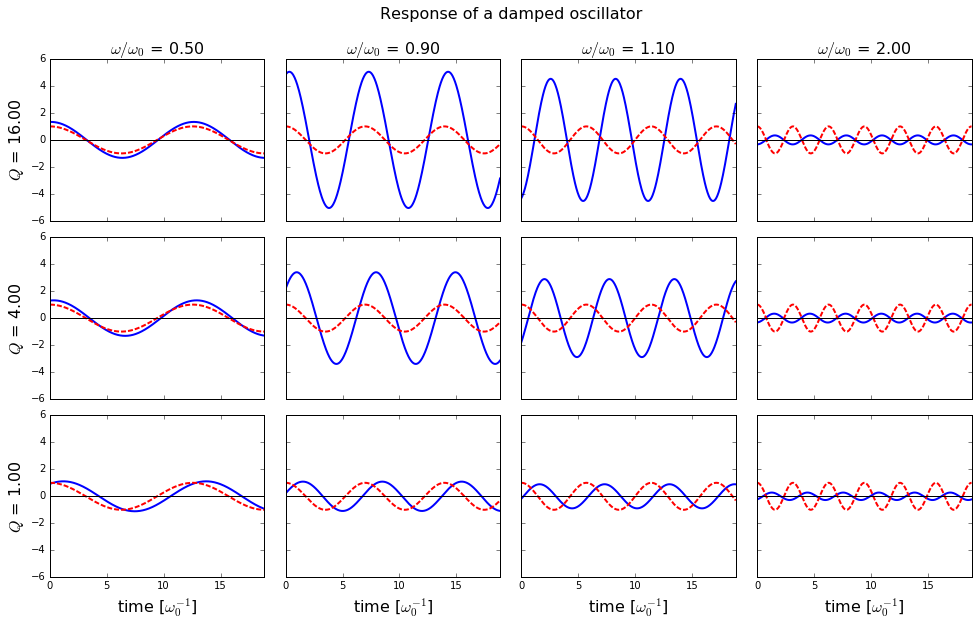

In [97]:
### plot response for an damped oscillator ###
# model parameters
mass = 1.0
omega0 = 1.0
Q = np.array([16, 4, 1])
beta = omega0/(2*Q)
f0 = 1
omegaF = [0.5, 0.9, 1.1, 2.0]

# number of undamped periods
n = 3

# uniform time grid
tperiod = (2*np.pi)/omega0 
tmin = 0
tmax = n*tperiod
nsteps = 501
t = np.linspace(tmin, tmax, nsteps)

# plot
fig, axes = plt.subplots(nrows=3, ncols=4, sharex=True, sharey=True, figsize=(16,9))
fig.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.1, hspace=0.1)
fig.suptitle('Response of a damped oscillator', fontsize=16)
for i in range(3):
    for j in range(4):
        ax = axes[i,j]
        ax.plot(t, response(t, mass, omega0, beta[i], f0, omegaF[j]), 'b-', linewidth=2, label='response')
        ax.plot(t, driving(t, f0, omegaF[j]), 'r', linestyle=(0,(5,2)), linewidth=2, label='driving force')
        ax.axhline(y=0, color='k', linewidth=1)
        ax.set_xlim(tmin, tmax)
        if i == 0:
            ax.set_title(r'$\omega/\omega_{0}$ = %.2f' % omegaF[j], fontsize=16)
        if i == 2:
            ax.set_xlabel(r'time [$\omega_{0}^{-1}$]', fontsize=16)
        if j == 0:
            ax.set_ylabel(r'$Q$ = %.2f' % Q[i], fontsize=16)
plt.show()

## 3. Energy

The energy in the steady-state response, averaged over the driving force period ($T=2\pi/\omega$), is given by

$$
  \avg{K(t, \omega)} = \frac{1}{2}m\omega^2\avg{\dot{x}^2}
  = \frac{1}{4}m\omega^2 A(\omega)^2
$$
$$
  \avg{U(t, \omega)} = \frac{1}{2}m\omega_{0}^2 \avg{x^2}
  = \frac{1}{4}m\omega_{0}^2 A(\omega)^2
$$
$$
  \avg{E(t, \omega)} = \avg{K(t, \omega)} + \avg{U(t, \omega)} 
  = \frac{1}{4}m(\omega^2 + \omega_{0}^2)A(\omega)^2
$$

By definition, resonance occurs at the peak of the amplitude $A(\omega)$. By differentiating with respect to $\omega$ and setting equal to zero, it can easily be shown that this occurs at $\omega_{R} = \sqrt{\omega_{0}^2 - 2\beta^2}$. Average potential energy also peaks at the resonance frequency $\omega_{R}$, because it only depends on $\omega$ through the function $A(\omega)$. On the other hand, the average kinetic energy peaks at the natural frequency of the oscillator, $\omega_{0}$, which for a damped oscillator is always at a slightly higher frequency than the resonance frequency. Therefore, for a damped oscillator, potential energy and kinetic energy resonate at different frequencies. 

**Exercise [pen & paper]:** verify the above statements.

**Exercise [pen & paper]:** Examine the asymptotic behavior of the average kinetic, potential, and total energy. Explain why a driven mass on a spring is sometimes called "stiffness dominated" in the regime $\omega\ll\omega_{0}$, and in the opposite regime $\omega\gg\omega_{0}$ is called "mass dominated". 

**Exercise [matplotlib]:** plot the average kinetic energy, average potential energy, and average total energy on the same graph, as functions of the driving frequency. Do this for a value of $\beta$ (or $Q$) where the peaks of each quantity are easily resolved. Clearly demonstrate, graphically, that the peak of the kinetic energy coincides with the natural frequency of the system ($\omega_{0}$), the potential energy peaks at the resonant frequency ($\omega_{R}$), and the total energy peaks somewhere in between the two. Also note how the three curves behave in the asymptotic regimes $\omega\ll\omega_{0}$ and $\omega\gg\omega_{0}$.

In [98]:
# avg energy
def energy_avg(omega, mass, omega0, beta, f0):
    ke_avg = 0.25*mass*omega*omega*amp(omega, mass, omega0, beta, f0)**2
    pe_avg = 0.25*mass*omega0*omega0*amp(omega, mass, omega0, beta, f0)**2
    etot_avg = ke_avg + pe_avg
    return ke_avg, pe_avg, etot_avg

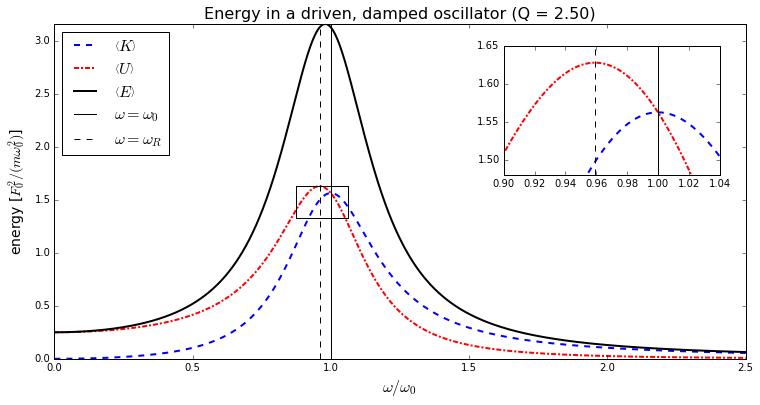

In [112]:
### plot frequency response of energy ###
# model parameters
mass = 1.0
omega0 = 1.0
Q = 2.5 
beta = omega0/(2*Q)
f0 = 1

# get values of interest
Emax = np.amax(energy_avg(omega, mass, omega0, beta, f0)[2])
omegaR = np.sqrt(omega0*omega0 - 2*beta*beta)

# plot avg kinetic, potential, total energy
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
fig.subplots_adjust(left=0.1, right=0.9)
# zoom out
ax1.plot(omega, energy_avg(omega, mass, omega0, beta, f0)[0], 
         color='b', linestyle='--', linewidth=2, label=r'$\left<K\right>$')
ax1.plot(omega, energy_avg(omega, mass, omega0, beta, f0)[1],
         color='r', linestyle=(0,(5,2,2,2)), linewidth=2, label=r'$\left<U\right>$')
ax1.plot(omega, energy_avg(omega, mass, omega0, beta, f0)[2],
         color='k', linestyle='-', linewidth=2, label=r'$\left<E\right>$')
ax1.axvline(x=1.0, color='k', linestyle='-', linewidth=1, label=r'$\omega = \omega_{0}$')
ax1.axvline(x=omegaR, color='k', linestyle='--', linewidth=1, label=r'$\omega = \omega_{R}$')
ax1.set_xlim(omegamin, omegamax)
ax1.set_ylim(0, Emax)
ax1.set_title('Energy in a driven, damped oscillator (Q = %.2f)' % Q, fontsize=16)
ax1.set_xlabel(r'$\omega/\omega_{0}$', fontsize=16)
ax1.set_ylabel(r'energy [$F_{0}^2/(m\omega_{0}^2)$]', fontsize=14)
ax1.legend(loc='upper left', fontsize=16)
# zoom box
left2, bottom2, width2, height2 = [0.38, 0.45, 0.06, 0.075]
ax2 = fig.add_axes([left2, bottom2, width2, height2])
ax2.patch.set_alpha(0.0)
ax2.set_xticks([])
ax2.set_yticks([])
# zoom in
left3, bottom3, width3, height3 = [0.62, 0.55, 0.25, 0.30]
ax3 = fig.add_axes([left3, bottom3, width3, height3])
ax3.plot(omega, energy_avg(omega, mass, omega0, beta, f0)[0], 
         color='b', linestyle='--', linewidth=2, label=r'$\avg{K}$')
ax3.plot(omega, energy_avg(omega, mass, omega0, beta, f0)[1], 
         color='r', linestyle=(0,(5,2,2,2)), linewidth=2, label=r'$\avg{U}$')
ax3.axvline(x=1.0, color='k', linestyle='-', linewidth=1)
ax3.axvline(x=omegaR, color='k', linestyle='--', linewidth=1)
ax3.set_xlim(0.90, 1.04)
ax3.set_ylim(1.48, 1.65)
# show plots
plt.show()

## 4. Power and energy balance

The average power delivered to the system by the driving force can be shown to be

$$
  \avg{P_\mathrm{driving}} = \avg{F(t)\dot{x}(t)}
  = \frac{F_{0}}{4m\beta}[R(\omega)]^2
$$

where $R(\omega)$ is sometimes called the response function, given by

$$
  R(\omega) = \frac{2\beta\omega}{\sqrt{(\omega_{0}^2 - \omega^2)^2 + (2\beta\omega)^2}}.
$$

The response fuction has the nice properties of being dimensionless, it has its peak at $\omega_{0}$ and peak value of 1. This implies that the average power also has a peak at $\omega_{0}$ and that its peak value is given by $P_\mathrm{max}=F_{0}^2/(4m\beta)$.

The average power absorbed by the damping force can also be calculated, given by $\avg{P_\mathrm{damping}}=\avg{F(t)\dot{x}(t)}$. The result is equal but opposite to the average power delivered to the system by the driving force. That is

$$
  \avg{P_\mathrm{damping}} = -\avg{P_\mathrm{driving}}
$$

This demonstrates energy balance in the system, on average (i.e., the same amount of energy added to the oscillator each cycle by the driving force is removed by the damping force).

**Exercise [pen & paper]:** verify the energy balance statement above.

**Exercise [pen & paper]:** verify directly that the total average power delivered to the system, given by $\avg{P_\mathrm{total}}=\frac{d\avg{E}}{dt}$, vanishes identically.

**Exercise [sympy]:** verify that the response function, $R(\omega)$ define above, has a peak at $\omega_{0}$ and has peak value of 1.

In [62]:
# import sympy
import sympy as sym
# turn on printing
sym.init_printing()

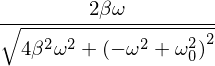

In [78]:
# declare variables
omega, m, omega0, beta = sym.symbols('omega, m, omega0, beta', positive=True)

# response function
R = 2*beta*omega/sym.sqrt((omega0**2 - omega**2)**2 + (2*beta*omega)**2)
R

In [79]:
# peak frequency
omegaR = sym.solve(sym.diff(R, omega), omega)[0]
omegaR

In [80]:
# peak value
Rmax = R.subs(omega, omegaR)
Rmax

## 5. Additional interpretations of Q

We defined the Q-factor above as 

$$
  Q \equiv \frac{\omega_{0}}{2\beta}.
$$

We saw that this is a convenient dimensionless quantity that indicates how undamped the system is (high-Q corresponding to weak damping). 

The Q-factor also has a direct interpretation in terms of power and energy balance of the system. We saw above that the average power delivered to the system peaks at $\omega_{0}$ with peak value given by $P_\mathrm{max}$. For a weakly damped oscillator ($\beta\ll\omega_{0}$), the frequencies at half-max are

$$
  \omega_{\pm} \simeq \omega_{0} \pm \beta 
$$

If we define the full-width at half-max power as $\Delta{\omega}\equiv\omega_{+}-\omega_{-}$, then in the weak damping limit we have $\Delta{\omega}\simeq 2\beta$. Therefore an alternative but equivalent definition of the Q-factor is 

$$
  Q \equiv \frac{\omega_{0}}{\Delta{\omega}}
  \simeq \frac{\omega_{0}}{2\beta}.
$$

Yet another interpretation of Q is the following. The ratio of the total energy stored in the oscillator per cycle to the energy dissipated per cycle is equal to 

$$
  \left(\frac{\text{energy stored}}{\text{energy dissipated per cycle}}\right)
  = \frac{\avg{E}}{\avg{P}T} = \frac{\avg{E}}{\avg{P}}\frac{\omega}{2\pi} 
  = \frac{1}{2\pi}\frac{(\omega_{0}^2 + \omega^2)}{4\beta\omega},
$$

where we have used $T=2\pi/\omega$. Near peak power this becomes

$$
  \left(\frac{\text{energy stored}}{\text{energy dissipated per cycle}}\right)
  \simeq \frac{1}{2\pi}\frac{\omega_{0}}{2\beta} = \frac{Q}{2\pi}.
$$

Therefore an alternative definition of Q that is often used is 

$$
   Q \equiv 2\pi \times \left(\frac{\text{energy stored}}{\text{energy dissipated per cycle}}\right)
   = \omega \times \left(\frac{\text{energy stored}}{\text{power dissipated}}\right)
   \simeq \frac{\omega_{0}}{2\beta}.
$$

**Exercise [pen & paper]:** verify that $\Delta{\omega}\simeq 2\beta$ for a weakly damped oscillator.

**Exercise [pen & paper]:** verify that Q is related to the ratio of energy stored to the energy dissipated per cycle, as stated above.

**Exercise [matplotlib]:** plot the power frequency response for $Q=[2,4,8]$. Indicate the FWHM on each plot.

In [141]:
# avg power delivered
def power_avg(omega, mass, omega0, beta, f0):
    Pmax = f0*f0/(4*beta*mass)
    den = 2*beta*omega
    num = np.sqrt((omega0*omega0 - omega*omega)**2 + (4*beta*beta*omega*omega))
    R = den/num
    return Pmax*R*R

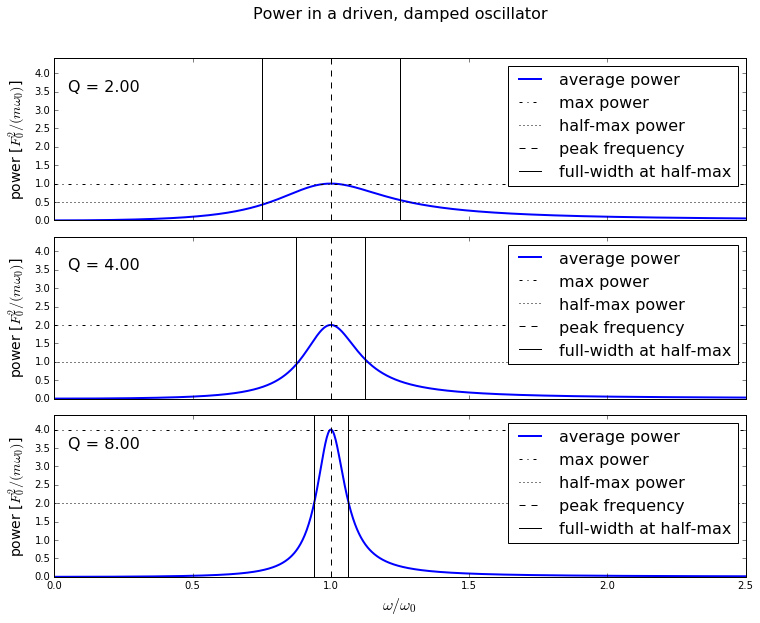

In [154]:
### plot frequency response of power ###
# model parameters
mass = 1.0
omega0 = 1.0
Q = np.array([2,4,8])
beta = omega0/(2*Q)
f0 = 1.0

# plot avg power and fwhm lines
fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, sharey=True, figsize=(12,9))
fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.1)
fig.suptitle('Power in a driven, damped oscillator', fontsize=16)
for i in range(3):
    # get values of interest
    Pmax = np.amax(power_avg(omega, mass, omega0, beta[i], f0))
    omega_plus = omega0 + beta[i]
    omega_minus = omega0 - beta[i]
    # plot
    ax = axes[i]
    ax.plot(omega, power_avg(omega, mass, omega0, beta[i], f0),
            color='b', linestyle='-', linewidth=2, label='average power')
    ax.axhline(y=Pmax, color='k', linestyle='-.', linewidth=1, label='max power')
    ax.axhline(y=Pmax/2, color='k', linestyle=':', linewidth=1, label='half-max power')
    ax.axvline(x=omega0, color='k', linestyle='--', linewidth=1, label='peak frequency')
    ax.axvline(x=omega_plus, color='k', linestyle='-', linewidth=1, label='full-width at half-max')
    ax.axvline(x=omega_minus, color='k', linestyle='-', linewidth=1)
    ax.set_xlim(omegamin, omegamax)
    ax.set_ylim(0, Pmax*1.1)
    ax.text(0.05, 3.5, 'Q = %.2f' % Q[i], fontsize=16)
    if i == 2:
        ax.set_xlabel(r'$\omega/\omega_{0}$', fontsize=16)
    ax.set_ylabel(r'power [$F_{0}^2/(m\omega_{0})$]', fontsize=14)
    ax.legend(loc='upper right', fontsize=16)
# show plots
plt.show()